In [295]:
# Importation des modules

import pandas as pd
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim

logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from gensim.models.phrases import Phrases, Phraser

import multiprocessing

from gensim.models import Word2Vec

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Affichage de toutes les colonnes

pd.set_option('display.max_columns', 500)

In [296]:
df0 = pd.read_csv('data/data_cleaned_NLP.csv', sep = ',', encoding = 'latin-1')

In [159]:
df1 = df0[['Réplique', 'Groupe', 'tokenized_replique']].copy()

df = df1[['Groupe', 'tokenized_replique']].copy()

In [160]:
df.sample(10)

,Groupe,tokenized_replique
430480,Exp,importe quoi
423401,Novice,rapporteur très bien
316636,Exp,enfin agit donner outil supplémentaire adminis...
188804,Exp,quel avis commission
103688,Exp,vise appliquer certain nombre biens services l...
456852,Exp,première lecture nombreux être très mobilisés ...
235906,Exp,aussi pôle public ferroviaire gérant réseau ma...
301789,Exp,faut donc sans plus tarder renforcer effectifs...
230927,Exp,sachant agit travail nouveau première année
123408,Exp,or depuis récente décision administrative lais...


In [161]:
df = df.dropna()
df.isnull().sum()

Groupe                0
tokenized_replique    0
dtype: int64

In [163]:
sent = [row.split() for row in df['tokenized_replique']]

In [164]:
phrases = Phrases(sent, min_count=30, progress_per = 10000)

INFO - 17:57:11: collecting all words and their counts
INFO - 17:57:11: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 17:57:12: PROGRESS: at sentence #10000, processed 289462 words and 218376 word types
INFO - 17:57:13: PROGRESS: at sentence #20000, processed 541314 words and 376873 word types
INFO - 17:57:13: PROGRESS: at sentence #30000, processed 809107 words and 528669 word types
INFO - 17:57:14: PROGRESS: at sentence #40000, processed 1085336 words and 672663 word types
INFO - 17:57:14: PROGRESS: at sentence #50000, processed 1340891 words and 796499 word types
INFO - 17:57:15: PROGRESS: at sentence #60000, processed 1565678 words and 900147 word types
INFO - 17:57:16: PROGRESS: at sentence #70000, processed 1813551 words and 1010525 word types
INFO - 17:57:16: PROGRESS: at sentence #80000, processed 2028492 words and 1100387 word types
INFO - 17:57:17: PROGRESS: at sentence #90000, processed 2303527 words and 1217601 word types
INFO - 17:57:18: PROGRESS: at 

In [165]:
bigram = Phraser(phrases)

INFO - 17:57:42: source_vocab length 4165308
INFO - 17:58:32: Phraser built with 9539 phrasegrams


In [166]:
sentences = bigram[sent]

In [167]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

91992

In [168]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['a', 'plus', 'cette', 'comme', 'si', 'donc', 'tout', 'fait', 'état', 'bien']

In [170]:
cores = multiprocessing.cpu_count()

In [171]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [172]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 17:59:10: collecting all words and their counts
INFO - 17:59:10: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:59:10: PROGRESS: at sentence #10000, processed 251462 words, keeping 26542 word types
INFO - 17:59:11: PROGRESS: at sentence #20000, processed 472392 words, keeping 35446 word types
INFO - 17:59:12: PROGRESS: at sentence #30000, processed 706898 words, keeping 41337 word types
INFO - 17:59:13: PROGRESS: at sentence #40000, processed 948477 words, keeping 45772 word types
INFO - 17:59:14: PROGRESS: at sentence #50000, processed 1171159 words, keeping 48836 word types
INFO - 17:59:14: PROGRESS: at sentence #60000, processed 1366810 words, keeping 51338 word types
INFO - 17:59:15: PROGRESS: at sentence #70000, processed 1582963 words, keeping 53473 word types
INFO - 17:59:16: PROGRESS: at sentence #80000, processed 1769282 words, keeping 55319 word types
INFO - 17:59:17: PROGRESS: at sentence #90000, processed 2008284 words, keeping 57474 word

Time to build vocab: 0.88 mins


In [173]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 18:00:02: training model with 3 workers on 30701 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 18:00:03: EPOCH 1 - PROGRESS: at 1.04% examples, 94321 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:04: EPOCH 1 - PROGRESS: at 2.30% examples, 98964 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:05: EPOCH 1 - PROGRESS: at 3.15% examples, 85143 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:06: EPOCH 1 - PROGRESS: at 4.36% examples, 84300 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:07: EPOCH 1 - PROGRESS: at 5.73% examples, 90310 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:09: EPOCH 1 - PROGRESS: at 7.37% examples, 96171 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:10: EPOCH 1 - PROGRESS: at 8.95% examples, 100699 words/s, in_qsize 0, out_qsize 0
INFO - 18:00:11: EPOCH 1 - PROGRESS: at 10.64% examples, 103212 words/s, in_qsize 1, out_qsize 0
INFO - 18:00:12: EPOCH 1 - PROGRESS: at 11.93% examples, 100294 words/s, in_qsize 0, out_qsize 0
INFO 

INFO - 18:01:28: EPOCH 2 - PROGRESS: at 24.76% examples, 100672 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:29: EPOCH 2 - PROGRESS: at 26.29% examples, 102175 words/s, in_qsize 1, out_qsize 0
INFO - 18:01:30: EPOCH 2 - PROGRESS: at 27.82% examples, 103437 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:31: EPOCH 2 - PROGRESS: at 29.40% examples, 103481 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:32: EPOCH 2 - PROGRESS: at 31.74% examples, 104063 words/s, in_qsize 1, out_qsize 0
INFO - 18:01:33: EPOCH 2 - PROGRESS: at 33.38% examples, 104559 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:34: EPOCH 2 - PROGRESS: at 36.04% examples, 104340 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:35: EPOCH 2 - PROGRESS: at 39.24% examples, 104146 words/s, in_qsize 0, out_qsize 1
INFO - 18:01:36: EPOCH 2 - PROGRESS: at 40.80% examples, 105005 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:37: EPOCH 2 - PROGRESS: at 42.36% examples, 105580 words/s, in_qsize 0, out_qsize 0
INFO - 18:01:38: EPOCH 2 - PRO

INFO - 18:02:52: EPOCH 3 - PROGRESS: at 68.17% examples, 125375 words/s, in_qsize 0, out_qsize 0
INFO - 18:02:53: EPOCH 3 - PROGRESS: at 69.92% examples, 125419 words/s, in_qsize 1, out_qsize 0
INFO - 18:02:54: EPOCH 3 - PROGRESS: at 71.31% examples, 125020 words/s, in_qsize 0, out_qsize 0
INFO - 18:02:55: EPOCH 3 - PROGRESS: at 72.91% examples, 124729 words/s, in_qsize 1, out_qsize 0
INFO - 18:02:56: EPOCH 3 - PROGRESS: at 74.35% examples, 124427 words/s, in_qsize 0, out_qsize 0
INFO - 18:02:57: EPOCH 3 - PROGRESS: at 75.76% examples, 123943 words/s, in_qsize 0, out_qsize 0
INFO - 18:02:58: EPOCH 3 - PROGRESS: at 77.92% examples, 123689 words/s, in_qsize 0, out_qsize 0
INFO - 18:02:59: EPOCH 3 - PROGRESS: at 79.47% examples, 123600 words/s, in_qsize 0, out_qsize 0
INFO - 18:03:00: EPOCH 3 - PROGRESS: at 80.95% examples, 123001 words/s, in_qsize 0, out_qsize 0
INFO - 18:03:01: EPOCH 3 - PROGRESS: at 84.54% examples, 121940 words/s, in_qsize 0, out_qsize 0
INFO - 18:03:02: EPOCH 3 - PRO

INFO - 18:04:14: EPOCH 5 - PROGRESS: at 4.79% examples, 126402 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:15: EPOCH 5 - PROGRESS: at 6.03% examples, 120238 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:16: EPOCH 5 - PROGRESS: at 7.67% examples, 123032 words/s, in_qsize 1, out_qsize 0
INFO - 18:04:17: EPOCH 5 - PROGRESS: at 9.40% examples, 125362 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:18: EPOCH 5 - PROGRESS: at 11.37% examples, 125519 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:19: EPOCH 5 - PROGRESS: at 13.22% examples, 126333 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:20: EPOCH 5 - PROGRESS: at 15.18% examples, 126956 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:21: EPOCH 5 - PROGRESS: at 17.11% examples, 127585 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:22: EPOCH 5 - PROGRESS: at 18.83% examples, 128363 words/s, in_qsize 1, out_qsize 0
INFO - 18:04:23: EPOCH 5 - PROGRESS: at 20.62% examples, 128449 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:24: EPOCH 5 - PROGRES

INFO - 18:05:39: EPOCH 6 - PROGRESS: at 56.13% examples, 128790 words/s, in_qsize 0, out_qsize 1
INFO - 18:05:40: EPOCH 6 - PROGRESS: at 58.01% examples, 129052 words/s, in_qsize 1, out_qsize 0
INFO - 18:05:41: EPOCH 6 - PROGRESS: at 59.81% examples, 129014 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:42: EPOCH 6 - PROGRESS: at 61.13% examples, 128419 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:43: EPOCH 6 - PROGRESS: at 62.78% examples, 127887 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:44: EPOCH 6 - PROGRESS: at 64.07% examples, 126644 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:45: EPOCH 6 - PROGRESS: at 65.21% examples, 125610 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:46: EPOCH 6 - PROGRESS: at 66.89% examples, 125872 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:47: EPOCH 6 - PROGRESS: at 68.27% examples, 125823 words/s, in_qsize 1, out_qsize 0
INFO - 18:05:48: EPOCH 6 - PROGRESS: at 69.92% examples, 125733 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:49: EPOCH 6 - PRO

INFO - 18:07:03: EPOCH 7 - PROGRESS: at 87.49% examples, 106698 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:04: EPOCH 7 - PROGRESS: at 89.01% examples, 106796 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:05: EPOCH 7 - PROGRESS: at 90.62% examples, 107271 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:06: EPOCH 7 - PROGRESS: at 92.83% examples, 107627 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:07: EPOCH 7 - PROGRESS: at 94.80% examples, 108045 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:08: EPOCH 7 - PROGRESS: at 96.13% examples, 107530 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:09: EPOCH 7 - PROGRESS: at 96.93% examples, 106591 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:10: EPOCH 7 - PROGRESS: at 98.15% examples, 106125 words/s, in_qsize 1, out_qsize 0
INFO - 18:07:11: EPOCH 7 - PROGRESS: at 99.87% examples, 106395 words/s, in_qsize 2, out_qsize 1
INFO - 18:07:11: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:11: worker thread finished; awaiting fi

INFO - 18:08:25: EPOCH 9 - PROGRESS: at 4.71% examples, 92999 words/s, in_qsize 1, out_qsize 0
INFO - 18:08:26: EPOCH 9 - PROGRESS: at 5.81% examples, 92974 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:27: EPOCH 9 - PROGRESS: at 6.99% examples, 91671 words/s, in_qsize 1, out_qsize 0
INFO - 18:08:28: EPOCH 9 - PROGRESS: at 7.84% examples, 89191 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:29: EPOCH 9 - PROGRESS: at 9.48% examples, 94007 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:30: EPOCH 9 - PROGRESS: at 11.37% examples, 96607 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:31: EPOCH 9 - PROGRESS: at 12.52% examples, 94890 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:32: EPOCH 9 - PROGRESS: at 14.26% examples, 97449 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:34: EPOCH 9 - PROGRESS: at 15.99% examples, 98074 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:35: EPOCH 9 - PROGRESS: at 17.43% examples, 99364 words/s, in_qsize 0, out_qsize 0
INFO - 18:08:36: EPOCH 9 - PROGRESS: at 18.92

INFO - 18:09:50: EPOCH 10 - PROGRESS: at 28.47% examples, 96537 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:51: EPOCH 10 - PROGRESS: at 30.17% examples, 97073 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:52: EPOCH 10 - PROGRESS: at 32.19% examples, 96939 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:53: EPOCH 10 - PROGRESS: at 33.70% examples, 97236 words/s, in_qsize 1, out_qsize 0
INFO - 18:09:54: EPOCH 10 - PROGRESS: at 38.57% examples, 98400 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:55: EPOCH 10 - PROGRESS: at 40.29% examples, 99565 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:56: EPOCH 10 - PROGRESS: at 41.93% examples, 100760 words/s, in_qsize 1, out_qsize 0
INFO - 18:09:57: EPOCH 10 - PROGRESS: at 43.70% examples, 101743 words/s, in_qsize 0, out_qsize 0
INFO - 18:09:58: EPOCH 10 - PROGRESS: at 45.33% examples, 102697 words/s, in_qsize 0, out_qsize 0
INFO - 18:10:00: EPOCH 10 - PROGRESS: at 47.00% examples, 103600 words/s, in_qsize 0, out_qsize 0
INFO - 18:10:01: EPOCH 10 

Time to train the model: 10.66 mins


In [174]:
w2v_model.init_sims(replace=True)

INFO - 18:10:42: precomputing L2-norms of word weight vectors


In [175]:
w2v_model.wv.most_similar(positive=["macron"])

[('candidat_emmanuel', 0.6083074808120728),
 ('emmanuel_macron', 0.6003855466842651),
 ('candidat_macron', 0.5924217700958252),
 ('sarkozy', 0.5741581916809082),
 ('françois_hollande', 0.5740947127342224),
 ('nicolas_sarkozy', 0.5588964223861694),
 ('hollande', 0.5512332320213318),
 ('fillon', 0.549187183380127),
 ('président_macron', 0.5449208617210388),
 ('juppé', 0.5312817692756653)]

In [191]:
w2v_model.wv.most_similar(positive=["philippe"])

[('mme_ministre', 0.6248994469642639),
 ('mme_secrétaire', 0.6177802085876465),
 ('secrétaire_état', 0.5985841751098633),
 ('garde_sceaux', 0.5923207998275757),
 ('gérald_darmanin', 0.5764926075935364),
 ('ministre_solidarités', 0.5588624477386475),
 ('ministre_sports', 0.5570619106292725),
 ('mme_borne', 0.554517388343811),
 ('mme_buzyn', 0.5526615977287292),
 ('gérard_collomb', 0.5485752820968628)]

In [185]:
w2v_model.wv.most_similar(negative=["promesse"])

[('analogues', 0.33974823355674744),
 ('toute_série', 0.3064239025115967),
 ('chromosomiques', 0.2989542782306671),
 ('chimiques', 0.28292593359947205),
 ('spéciales', 0.28267109394073486),
 ('connexes', 0.28129732608795166),
 ('recevables', 0.2778879404067993),
 ('ips', 0.2730802297592163),
 ('peuvent_exister', 0.27005520462989807),
 ('limitativement', 0.2650907635688782)]

In [178]:
w2v_model.wv.similarity("élection", 'présidentielle')

0.36179188

In [206]:
w2v_model.wv.similarity("sport", 'études')

0.033225752

In [180]:
print(w2v_model.wv.similarity("macron", 'droite'))
print(w2v_model.wv.similarity("macron", 'gauche'))

0.23601696
0.14838734


In [181]:
w2v_model.wv.doesnt_match(['gauche', 'président', 'droite'])

/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'président'

In [230]:
w2v_model.wv.most_similar(positive=["père", "femme"], negative = ['homme'], topn=3)

[('mère', 0.5585302114486694),
 ('compagne', 0.5314989686012268),
 ('papa', 0.5292541980743408)]

In [278]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
        
    # Reduces the dimensionality from 300 to 19 dimensions with PCA
    reduc = PCA(n_components=14).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [279]:
w2v_model.wv.most_similar(positive=["macron"])

[('candidat_emmanuel', 0.6083074808120728),
 ('emmanuel_macron', 0.6003855466842651),
 ('candidat_macron', 0.5924217700958252),
 ('sarkozy', 0.5741581916809082),
 ('françois_hollande', 0.5740947127342224),
 ('nicolas_sarkozy', 0.5588964223861694),
 ('hollande', 0.5512332320213318),
 ('fillon', 0.549187183380127),
 ('président_macron', 0.5449208617210388),
 ('juppé', 0.5312817692756653)]

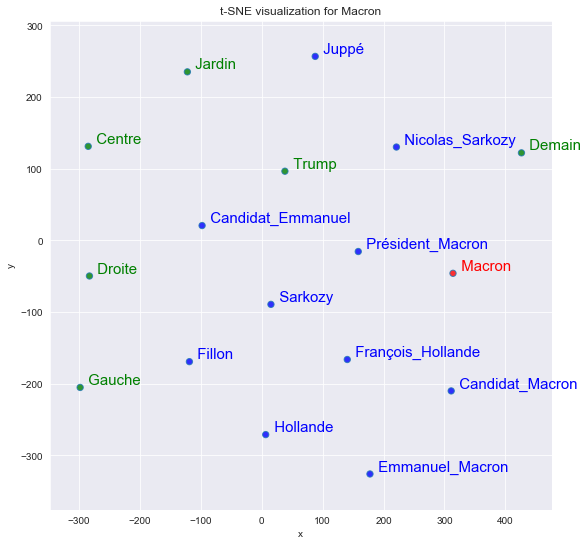

In [288]:
tsnescatterplot(w2v_model, 'macron', ['droite', 'gauche', 'centre', 'demain', 'trump', 'jardin'
                                      ])



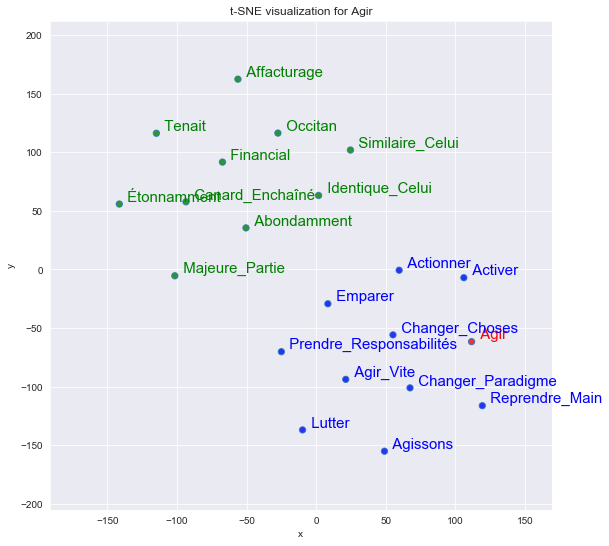

In [293]:
tsnescatterplot(w2v_model, 'agir', [i[0] for i in w2v_model.wv.most_similar(negative=["agir"])])

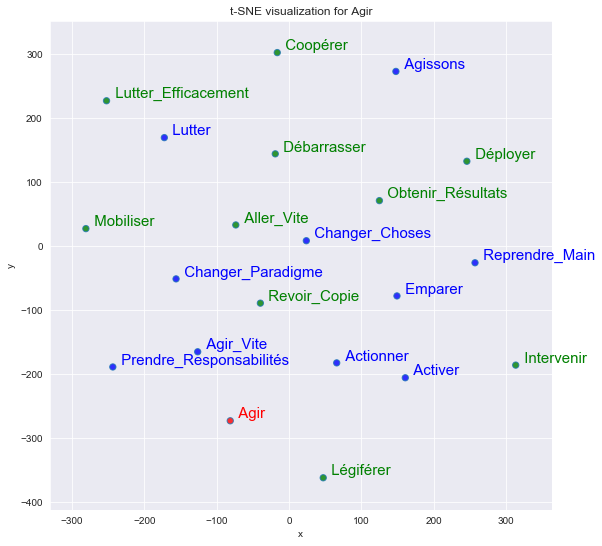

In [294]:
tsnescatterplot(w2v_model, "agir", [t[0] for t in w2v_model.wv.most_similar(positive=["agir"], topn=20)][10:])